In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./ushape.csv', header=None)
df.columns = ['X', 'Y', 'class']

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


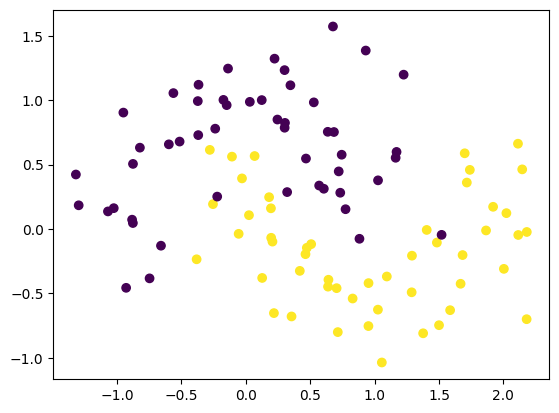

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[-0.00274122,  0.4156639 ,  0.6468491 ,  0.14058787, -0.65242344,
         -0.6011656 ,  0.14610964, -0.58922845, -0.3361958 , -0.09858316],
        [ 0.08570004, -0.04216355, -0.15753466, -0.410294  , -0.02102369,
          0.5130293 ,  0.17967469, -0.25353673,  0.37828165,  0.16967225]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7167364 ],
        [-0.6017725 ],
        [ 0.18409699],
        [-0.512557  ],
        [-0.521937  ],
        [-0.70315397],
        [-0.1869191 ],
        [-0.4714383 ],
        [ 0.57045597],
        [ 0.619839  ]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.5156 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4883 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4609 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4648 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4805 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss

In [15]:
model.get_weights()

[array([[-0.46166837, -0.46166837, -0.46166837, -0.46166837, -0.46166837,
         -0.46166837, -0.46166837, -0.46166837, -0.46166834, -0.46166834],
        [ 0.49092066,  0.49092066,  0.49092066,  0.49092066,  0.49092066,
          0.49092066,  0.49092066,  0.49092066,  0.49092066,  0.49092066]],
       dtype=float32),
 array([-0.09724638, -0.09724638, -0.09724638, -0.09724638, -0.09724638,
        -0.09724638, -0.09724638, -0.09724638, -0.09724638, -0.09724638],
       dtype=float32),
 array([[-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689431],
        [-0.06689429],
        [-0.06689429]], dtype=float32),
 array([0.06604279], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


<Axes: >

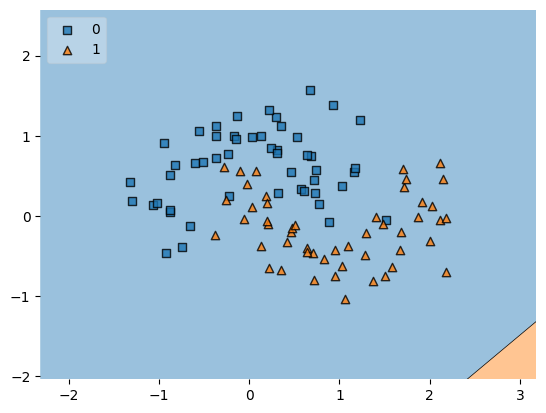

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:

model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2)) # tanh same story as youve done theoratically
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
initial_weights = model2.get_weights()

In [19]:
initial_weights[0] = np.zeros(model2.get_weights()[0].shape)
initial_weights[1] = np.zeros(model2.get_weights()[1].shape)
initial_weights[2] = np.zeros(model2.get_weights()[2].shape)
initial_weights[3] = np.zeros(model2.get_weights()[3].shape)

In [20]:
model2.set_weights(initial_weights)

In [21]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5195 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4961 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [24]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.00305205], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

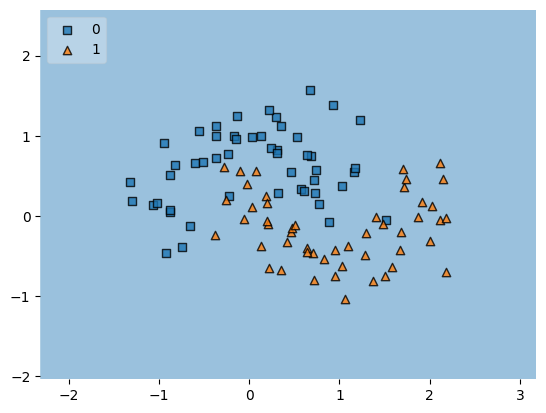

In [25]:

plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)